# Ejercicios: Regresión Lineal Simple

In [ ]:
install.packages("tidyverse")
install.packages("rstatix")
install.packages("psych")
install.packages("e1071")
install.packages("skimr")
install.packages("ggpubr")

library(tidyverse)
library(rstatix)
library(psych)
library(e1071)
library(skimr)
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df = haven::read_sav("https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/Clase10_BaseRegresionLinealSimple.sav")
df

Participante,Horas_Internet,Impulsividad,Rendimiento,Uso_patológico_internet,Uso_problemático_celular,Juego_patológico
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
001,9.1925851,14.016679,5.130105,29.979415,33.466436,51.629069
002,4.4173298,15.308135,2.493590,7.798216,29.608270,58.572777
003,8.9703907,9.383734,3.090073,79.417020,17.480083,7.207902
004,10.6271423,17.714813,8.166904,77.924891,49.801048,68.254753
005,3.2295466,15.691327,6.117007,24.903253,38.303082,34.883736
006,6.9243390,22.083637,4.756536,61.594703,46.584108,30.418557
007,11.2960200,14.162169,6.686044,83.992027,33.738549,62.581598
008,12.6609760,22.927041,6.639944,86.420525,59.746719,16.617752
009,6.9810690,13.014680,5.085130,61.863693,28.362086,29.797933


## Analiza las siguientes hipótesis de estudio:

### HT1: El uso patológico de internet predice la cantidad de horas que los estudiantes navegan en internet.

- Variable predictora (X) = Uso patológico del internet (PI)
- Variable de saluda (Y) = Cantidad de horas navegando en inernet  (HI)

$H_{0}: \beta_{PI} = 0$ vs $H_{1}: \beta_{PI} \ne 0$

**Ecuación del modelo**

$Y = \beta_{0} + \beta_{x}X_{x} \pm \epsilon ⇒ HI = \beta_{0} + \beta_{PI}X_{PI} \pm ϵ,$ con $\beta_{PI} \ne 0$

Gráfico de dispersión de puntos

`geom_smooth()` using formula = 'y ~ x'


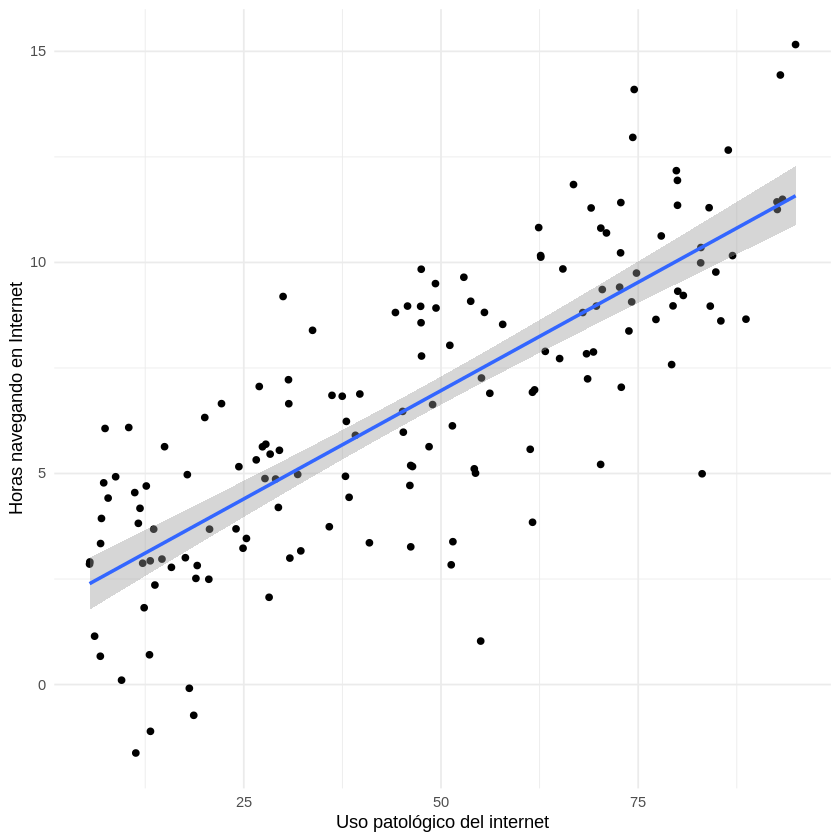

In [ ]:
df |> 
  ggplot(aes(x = Uso_patológico_internet, y = Horas_Internet)) + 
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Uso patológico del internet",
       y = "Horas navegando en Internet") +
  theme_minimal()

A partir del gráfico, se observa una posible tendencia lineal positiva entre las variables, de modo que a mayor uso patológico de internet, una posible mayor cantidad de horas en Internet. 

Prueba de normalidad

In [ ]:
df |> 
  shapiro_test(Uso_patológico_internet, Horas_Internet) |> 
  mutate(normal = case_when(p < .05 ~ F, T ~ T))

variable,statistic,p,normal
<chr>,<dbl>,<dbl>,<lgl>
Horas_Internet,0.9914451,0.5041663886,TRUE
Uso_patológico_internet,0.9474026,0.0000200496,FALSE


Hipótesis Estadísticas 

$H_{0} =$ la distribución de los grupos es normal

$H_{1} =$ la distribución de los grupos no es normal

A partir de la prueba de normalidad de Shapiro Wilk, se observa que si bien la cantidad de horas en internet tiene una distribución normal,$SW_{(150)} = .99, p = .50$, el uso patológico del internet presenta ciertos problemas de simetría, $SW_{(150)} = .95, p < .001$. Por todo ello, se realizará un análisis de correlación de Spearman.

Análisis de correlación

In [ ]:
df |> 
  select(Uso_patológico_internet, Horas_Internet) |> 
  psych::corr.test(method = "spearman")

Warning message in abbreviate(rownames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(colnames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”


Call:psych::corr.test(x = select(df, Uso_patológico_internet, Horas_Internet), 
    method = "spearman")
Correlation matrix 
                        Uso_patológico_internet Horas_Internet
Uso_patológico_internet                     1.0            0.8
Horas_Internet                              0.8            1.0
Sample Size 
[1] 150
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
                        Uso_patológico_internet Horas_Internet
Uso_patológico_internet                       0              0
Horas_Internet                                0              0

 To see confidence intervals of the correlations, print with the short=FALSE option

A partir del análisis de correlación de Spearman, se observa que existe una relación estadísticamente signifiativa, positiva y grande, según el criterio de Cohen(1988), entre el uso patológico del internet y la cantidad de horas que se emplea en navegar por internet, $r_{(148)} = .8, p < .001$.

Evaluar el modelo

In [ ]:
model |> summary()


Call:
lm(formula = "Horas_Internet ~ Uso_patológico_internet", data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4511 -1.1944  0.0056  1.5738  4.6174 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.831240   0.342985   5.339 3.44e-07 ***
Uso_patológico_internet 0.102661   0.006452  15.912  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.055 on 148 degrees of freedom
Multiple R-squared:  0.6311,	Adjusted R-squared:  0.6286 
F-statistic: 253.2 on 1 and 148 DF,  p-value: < 2.2e-16


Hipótesis Estadísticas 

$H_{0}: \beta_{PI} = 0$ vs $H_{1}: \beta_{PI} \ne 0$

Se rechaza H0 dado que el valor p es menor a .05. 

A partir del análisis de regresión lineal simple, se observa que existe un modelo grande, según el criterio de Cohen (1988), y adecuado del uso patológico del internet como predictor de la cantidad de horas que se pasan en esta plataforma, $R^{2} = .63, F_{(1, 148)} = 253.2, p < .001$. Espcíficamente, se encontró que el uso patológico es un predictor positivo de la cantidad de horas, $\beta_{PI} = .103, EE_{b} = .01, t_{(148)} = 15.912, p < .001$. Por todo ello, se cumple con las hipótesis de los investigadores. 

Ecuación del modelo 

$CH = 1.83 + .10(PI) \pm 2.055$

HT2: El uso problemático del celular disminuye el rendimiento académico (RA) de estudiantes de secundaria.


- Variable predictora (X) = Uso patológico del celular (PC)
- Variable de saluda (Y) = Rendimiento Académico (RA)

$H_{0}: \beta_{PC} = 0$ vs $H_{1}: \beta_{PC} < 0$

**Ecuación del modelo**

$Y = \beta_{0} + \beta_{x}X_{x} \pm \epsilon ⇒ RA = \beta_{0} + \beta_{PC}X_{PC} \pm ϵ,$ con $\beta_{PC} < 0$

Gráfico de dispersión de puntos

`geom_smooth()` using formula = 'y ~ x'


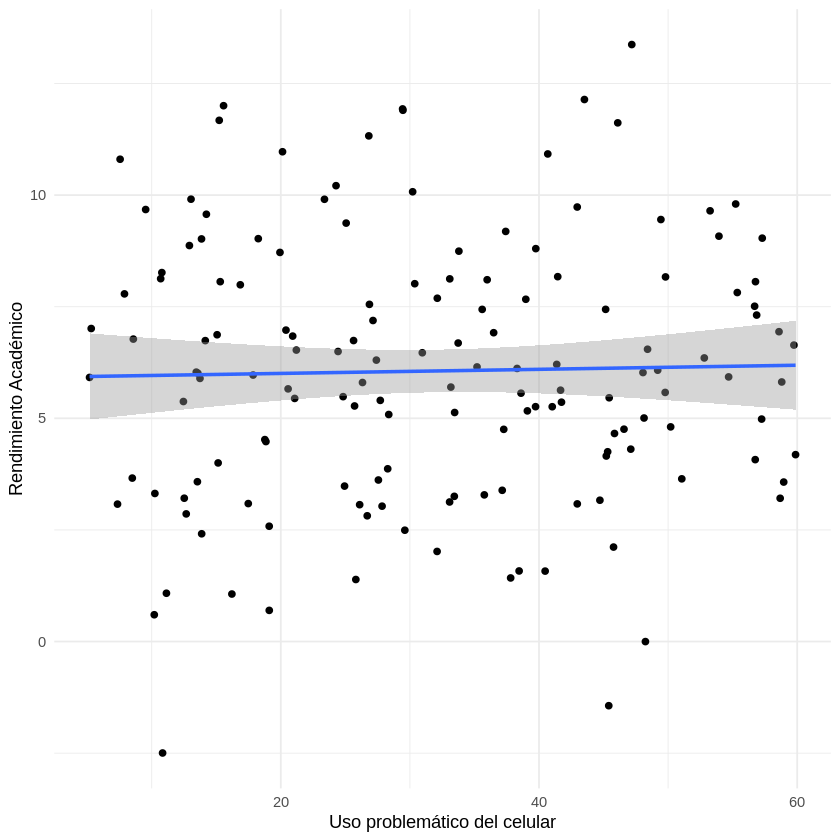

In [ ]:
df |> 
  ggplot(aes(x = Uso_problemático_celular, y = Rendimiento)) + 
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Uso problemático del celular",
       y = "Rendimiento Académico") +
  theme_minimal()

A partir del gráfico, se observa una posible relación nula entre las variables, dado que la tendencia de la pendiente no se posiciona para un lado o para el otro. 

Prueba de normalidad

In [ ]:
df |> 
  shapiro_test(Uso_problemático_celular, Rendimiento) |> 
  mutate(normal = case_when(p < .05 ~ F, T ~ T))

variable,statistic,p,normal
<chr>,<dbl>,<dbl>,<lgl>
Rendimiento,0.9949506,0.8860314674,TRUE
Uso_problemático_celular,0.9591323,0.0002039892,FALSE


Hipótesis Estadísticas 

$H_{0} =$ la distribución de los grupos es normal

$H_{1} =$ la distribución de los grupos no es normal

A partir de la prueba de normalidad de Shapiro Wilk, se observa que si bien el rendimiento tiene una distribución normal,$SW_{(150)} = .99, p = .89$, el uso patológico del celular presenta ciertos problemas de simetría, $SW_{(150)} = .96, p < .001$. Por todo ello, se realizará un análisis de correlación de Spearman.

Análisis de correlación

In [ ]:
df |> 
  select(Uso_problemático_celular, Rendimiento) |> 
  psych::corr.test(method = "spearman")

Warning message in abbreviate(rownames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(colnames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”


Call:psych::corr.test(x = select(df, Uso_problemático_celular, Rendimiento), 
    method = "spearman")
Correlation matrix 
                         Uso_problemático_celular Rendimiento
Uso_problemático_celular                     1.00        0.01
Rendimiento                                  0.01        1.00
Sample Size 
[1] 150
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
                         Uso_problemático_celular Rendimiento
Uso_problemático_celular                     0.00        0.88
Rendimiento                                  0.88        0.00

 To see confidence intervals of the correlations, print with the short=FALSE option

Dado que no existe una correlación lineal entre uso problemático del celular y rendimiento académico en la muestra de estudiantes de secundaria, r(148)=.01, p=.443 (unilateral), no hay evidencia que sustente la hipótesis de estudio de los investigadores.

### HT3: El juego patológico aumenta el nivel de impulsividad de estudiantes de secundaria.

- Variable predictora (X) = Juego Patológico (JP)
- Variable de saluda (Y) = Impulsividad (IM)

$H_{0}: \beta_{JP} = 0$ vs $H_{1}: \beta_{JP} > 0$

**Ecuación del modelo**

$Y = \beta_{0} + \beta_{x}X_{x} \pm \epsilon ⇒ IM = \beta_{0} + \beta_{JP}X_{JP} \pm ϵ,$ con $\beta_{JP} > 0$

Gráfico de dispersión de puntos

`geom_smooth()` using formula = 'y ~ x'


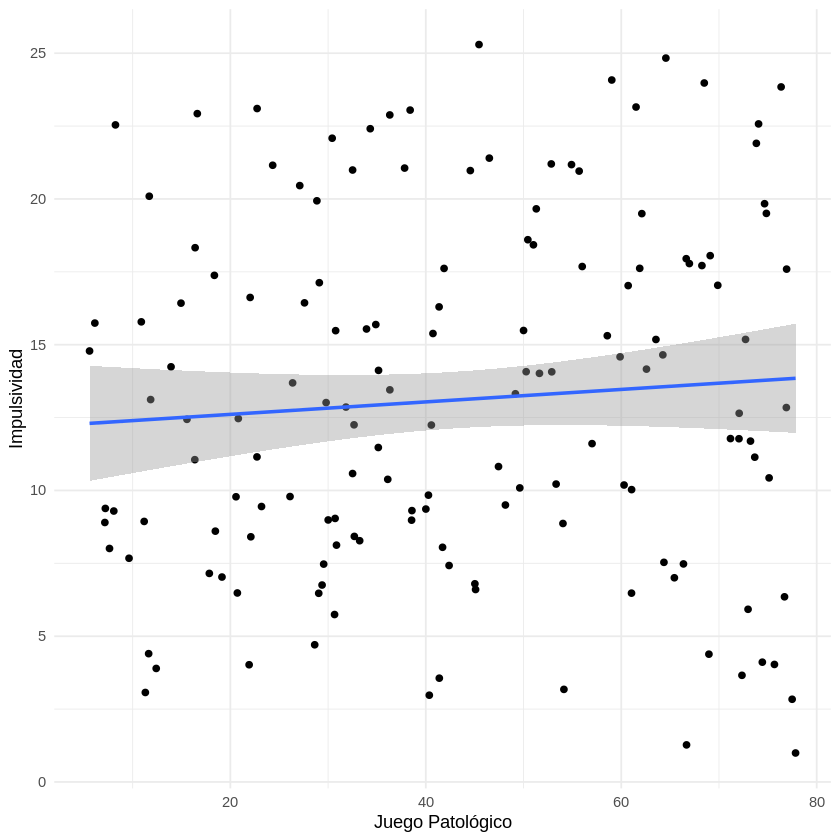

In [ ]:
df |> 
  ggplot(aes(x = Juego_patológico, y = Impulsividad)) + 
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Juego Patológico",
       y = "Impulsividad") +
  theme_minimal()

A partir del gráfico de dispersión de puntos, se observa una leve tendencia a una relación positiva. No obstante, es posible que la relación sea nula. 

Prueba de normalidad

In [ ]:
df |> 
  shapiro_test(Juego_patológico, Impulsividad) |> 
  mutate(normal = case_when(p < .05 ~ F, T ~ T))

variable,statistic,p,normal
<chr>,<dbl>,<dbl>,<lgl>
Impulsividad,0.9743426,6.577670e-03,FALSE
Juego_patológico,0.9521213,4.934017e-05,FALSE


Hipótesis Estadísticas 

$H_{0} =$ la distribución de los grupos es normal

$H_{1} =$ la distribución de los grupos no es normal

A partir de la prueba de normalidad de Shapiro Wilk, se observa que tanto la impulsividad, $SW_{(150)} = .97, p = .007$, y el juego patológico presentan una distribución no normal, $SW_{(150)} = .95, p < .001$. Por todo ello, se realizará un análisis de correlación de Spearman.

Análisis de correlación

In [ ]:
df |> 
  select(Juego_patológico, Impulsividad) |> 
  psych::corr.test(method = "spearman")

Warning message in abbreviate(rownames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(colnames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”


Call:psych::corr.test(x = select(df, Juego_patológico, Impulsividad), 
    method = "spearman")
Correlation matrix 
                 Juego_patológico Impulsividad
Juego_patológico             1.00         0.08
Impulsividad                 0.08         1.00
Sample Size 
[1] 150
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
                 Juego_patológico Impulsividad
Juego_patológico              0.0          0.3
Impulsividad                  0.3          0.0

 To see confidence intervals of the correlations, print with the short=FALSE option

Dado que no existe una correlación lineal entre juego patológico e impulsividad en estudiantes de secundaria, r(148)=-.08, p=.152 (unilateral), no hay evidencia que sustente la hipótesis de estudio de los investigadores.

### HT4: El uso problemático del celular aumenta la impulsividad reportada por estudiantes de secundaria.

- Variable predictora (X) = Uso problemático del celular (UPC)
- Variable de saluda (Y) = Impulsividad (IM)

$H_{0}: \beta_{UPC} = 0$ vs $H_{1}: \beta_{UPC} > 0$

**Ecuación del modelo**

$Y = \beta_{0} + \beta_{x}X_{x} \pm \epsilon ⇒ IM = \beta_{0} + \beta_{UPC}X_{UPC} \pm ϵ,$ con $\beta_{UPC} > 0$

Gráfico de dispersión de puntos

`geom_smooth()` using formula = 'y ~ x'


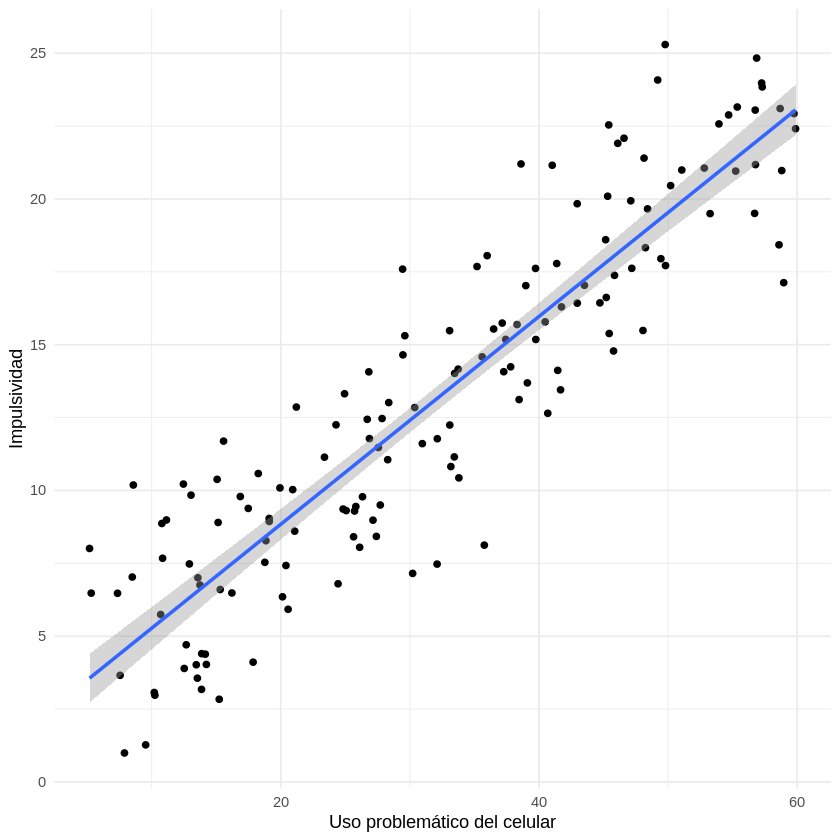

In [ ]:
df |> 
  ggplot(aes(x = Uso_problemático_celular, y = Impulsividad)) + 
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Uso problemático del celular",
       y = "Impulsividad") +
  theme_minimal()

A partir del gráfico, se observa una posible tendencia lineal positiva entre las variables, de modo que a mayor uso problemático de celular, una posible mayor impulsividad. 

Prueba de normalidad

In [ ]:
df |> 
  shapiro_test(Uso_problemático_celular, Impulsividad) |> 
  mutate(normal = case_when(p < .05 ~ F, T ~ T))

variable,statistic,p,normal
<chr>,<dbl>,<dbl>,<lgl>
Impulsividad,0.9743426,0.0065776697,FALSE
Uso_problemático_celular,0.9591323,0.0002039892,FALSE


$H_{0} =$ la distribución de los grupos es normal

$H_{1} =$ la distribución de los grupos no es normal

A partir de la prueba de normalidad de Shapiro Wilk, se observa que ninguna de las distribuciones evaluadas presenta distribución normal. Por tanto, se realizará un análisis de correlación de Spearman.

Análisis de correlación

In [ ]:
df |> 
  select(Uso_problemático_celular, Impulsividad) |> 
  psych::corr.test(method = "spearman")

Warning message in abbreviate(rownames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(colnames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”


Call:psych::corr.test(x = select(df, Uso_problemático_celular, Impulsividad), 
    method = "spearman")
Correlation matrix 
                         Uso_problemático_celular Impulsividad
Uso_problemático_celular                     1.00         0.91
Impulsividad                                 0.91         1.00
Sample Size 
[1] 150
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
                         Uso_problemático_celular Impulsividad
Uso_problemático_celular                        0            0
Impulsividad                                    0            0

 To see confidence intervals of the correlations, print with the short=FALSE option

A partir del análisis de correlación de Spearman, se observa que existe una relación estadísticamente signifiativa, positiva y grande, según el criterio de Cohen(1988), entre el uso problemático de celular y la impulsividad, $r_{(148)} = .9, p < .001$.

Evaluar el modelo

In [ ]:
model |> summary()


Call:
lm(formula = "Impulsividad ~ Uso_problemático_celular", data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3354 -1.9062 -0.0714  1.7340  5.8431 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.71136    0.48701   3.514 0.000586 ***
Uso_problemático_celular  0.35645    0.01376  25.910  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.566 on 148 degrees of freedom
Multiple R-squared:  0.8194,	Adjusted R-squared:  0.8181 
F-statistic: 671.3 on 1 and 148 DF,  p-value: < 2.2e-16


$H_{0}: \beta_{UPC} = 0$ vs $H_{1}: \beta_{UPC} \ne 0$

Se rechaza H0 dado que el valor p es menor a .05. 

A partir del análisis de regresión lineal simple, se observa que existe un modelo grande, según el criterio de Cohen (1988), y adecuado del uso problemático de celular como predictor de la impulsividad, $R^{2} = .82, F_{(1, 148)} = 671.3, p < .001$. Espcíficamente, se encontró que el uso problemático de celular es un predictor positivo de la impulsividad, $\beta_{UPC} = .356, EE_{b} = .01, t_{(148)} = 25.910, p < .001$. Por todo ello, se cumple con las hipótesis de los investigadores. 

Ecuación del modelo: 

$IM = 1.71 + .36(UPC) \pm 2.566$

HT5: El juego patológico disminuye el rendimiento académico de estudiantes de secundaria.

- Variable predictora (X) = Juego Patológico (JP)
- Variable de criterio (Y) = Rendimiento Académico (RA)

$H_{0}: \beta_{JP} = 0$ vs $H_{1}: \beta_{JP} < 0$

**Ecuación del modelo**

$Y = \beta_{0} + \beta_{x}X_{x} \pm \epsilon ⇒ RA = \beta_{0} + \beta_{JP}X_{JP} \pm ϵ,$ con $\beta_{JP} < 0$

Gráfico de dispersión de puntos

`geom_smooth()` using formula = 'y ~ x'


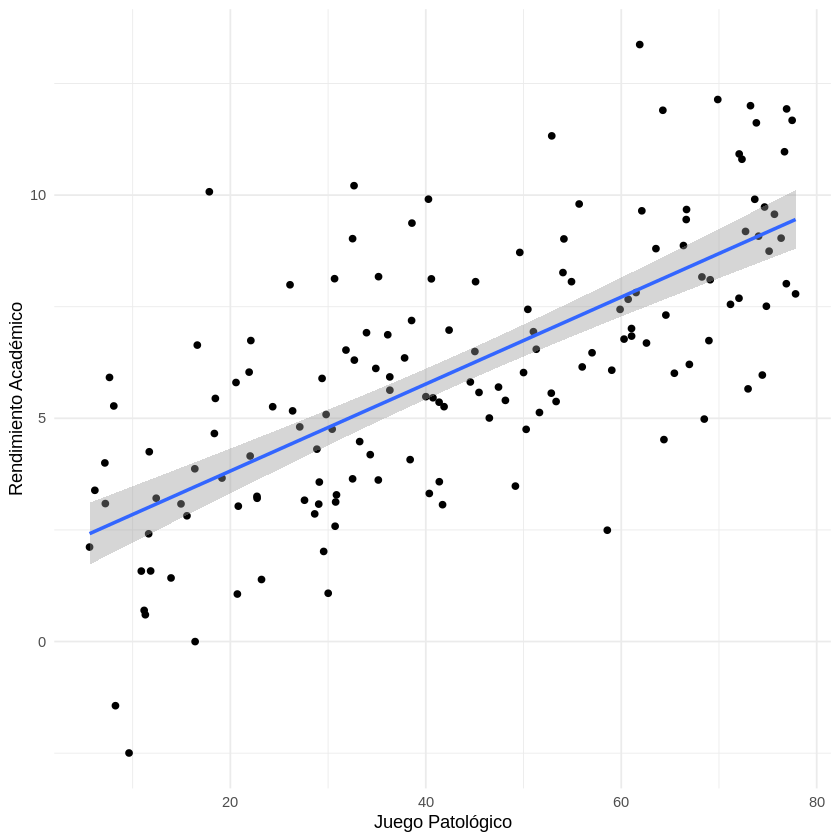

In [ ]:
df |> 
  ggplot(aes(x = Juego_patológico, y = Rendimiento)) + 
  geom_point() +
  geom_smooth(method = lm) +
  labs(x = "Juego Patológico",
       y = "Rendimiento Académico") +
  theme_minimal()

A partir del gráfico, se observa una posible tendencia lineal positiva entre las variables, de modo que a mayor juego patológico, un posible mayor rendimiento académico. 

Prueba de normalidad

In [ ]:
df |> 
  shapiro_test(Juego_patológico, Rendimiento) |> 
  mutate(normal = case_when(p < .05 ~ F, T ~ T))

variable,statistic,p,normal
<chr>,<dbl>,<dbl>,<lgl>
Juego_patológico,0.9521213,4.934017e-05,FALSE
Rendimiento,0.9949506,8.860315e-01,TRUE


A partir de la prueba de normalidad de Shapiro Wilk, se observa que si bien el rendimiento académico tiene una distribución normal,$SW_{(150)} = .99, p = .89$, el juego patológico no presenta una distribución normal, $SW_{(150)} = .95, p < .001$. Por todo ello, se realizará un análisis de correlación de Spearman.

Análisis de correlación

In [ ]:
df |> 
  select(Juego_patológico, Rendimiento) |> 
  psych::corr.test(method = "spearman")

Warning message in abbreviate(rownames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(colnames(r), minlength = minlength):
“abbreviate used with non-ASCII chars”
Warning message in abbreviate(dimnames(ans)[[2L]], minlength = abbr.colnames):
“abbreviate used with non-ASCII chars”


Call:psych::corr.test(x = select(df, Juego_patológico, Rendimiento), 
    method = "spearman")
Correlation matrix 
                 Juego_patológico Rendimiento
Juego_patológico             1.00        0.71
Rendimiento                  0.71        1.00
Sample Size 
[1] 150
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
                 Juego_patológico Rendimiento
Juego_patológico                0           0
Rendimiento                     0           0

 To see confidence intervals of the correlations, print with the short=FALSE option

Dado que no existe una correlación negativa entre el juego patológico y el rendimiento académico en estudiantes de secundaria, r(148)=.71, p=1.0 (unilateral), no hay evidencia que sustente la hipótesis de estudio de los investigadores.